In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
class Model():
    def __init__(self):
        self.w= tf.Variable(3.0)
        self.b =tf.Variable(2.0)

    def __call__(self, x):
        return x*self.w + self.b

model =Model()



In [2]:
# create a custom data

true_w =5.0
true_b =3.0
NUM_EXAMPLE =1000
random_x = tf.random.normal(shape=[NUM_EXAMPLE])
true_y = (true_w)*random_x + true_b


In [3]:
def loss(predicted_y, actual_y):
    return tf.reduce_mean(tf.square(predicted_y,actual_y))


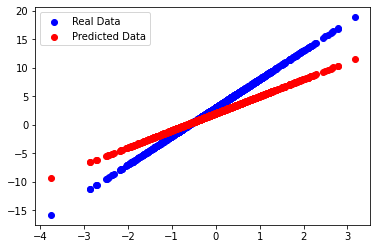

current loss: 12.925233840942382812500000000000000000000000000000000000000000000000


In [4]:
def plotdata(input, output, predicted_output):
    real = plt.scatter(input, output,c='b')
    predicted =plt.scatter(input,predicted_output, c='r')
    plt.legend((real, predicted), ('Real Data', 'Predicted Data'))
    plt.show()


plotdata(random_x, true_y,model(random_x))
print("current loss: %1.66f" %loss(model(random_x),true_y ))
plt.show()


In [5]:
import random

def train(model,input, output, learningRate):
    with tf.GradientTape() as t:
        currentLoss = loss(model(input), output)
    dw, db = t.gradient(currentLoss, (model.w, model.b))
    model.w.assign_sub(learningRate * dw)
    model.w.assign_sub(learningRate * db)
    return currentLoss



In [6]:
list_w, list_b = [], []
epochs = range(25)
losses=[]
for epoch in epochs:
    list_w.append(model.w.numpy())
    list_b.append(model.b.numpy())
    currentLoss = train(model,random_x,true_y, learningRate=0.1)
    losses.append(currentLoss)
    print("Epoch %2d: W=%1.2f, b=%1.2f, loss=%2f" %(epoch, list_w[-1], list_b[-1], currentLoss))

Epoch  0: W=3.00, b=2.00, loss=12.925234
Epoch  1: W=2.01, b=2.00, loss=7.978060
Epoch  2: W=1.21, b=2.00, loss=5.436994
Epoch  3: W=0.57, b=2.00, loss=4.314755
Epoch  4: W=0.06, b=2.00, loss=4.002426
Epoch  5: W=-0.35, b=2.00, loss=4.129086
Epoch  6: W=-0.68, b=2.00, loss=4.472650
Epoch  7: W=-0.94, b=2.00, loss=4.903415
Epoch  8: W=-1.15, b=2.00, loss=5.348436
Epoch  9: W=-1.32, b=2.00, loss=5.769161
Epoch 10: W=-1.46, b=2.00, loss=6.147479
Epoch 11: W=-1.57, b=2.00, loss=6.477082
Epoch 12: W=-1.65, b=2.00, loss=6.758187
Epoch 13: W=-1.72, b=2.00, loss=6.994356
Epoch 14: W=-1.78, b=2.00, loss=7.190611
Epoch 15: W=-1.82, b=2.00, loss=7.352378
Epoch 16: W=-1.86, b=2.00, loss=7.484899
Epoch 17: W=-1.89, b=2.00, loss=7.592949
Epoch 18: W=-1.91, b=2.00, loss=7.680725
Epoch 19: W=-1.93, b=2.00, loss=7.751831
Epoch 20: W=-1.94, b=2.00, loss=7.809303
Epoch 21: W=-1.96, b=2.00, loss=7.855673
Epoch 22: W=-1.97, b=2.00, loss=7.893034
Epoch 23: W=-1.97, b=2.00, loss=7.923105
Epoch 24: W=-1.98, b